# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [2]:
# importer vos librairies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

sns.set_theme()

In [3]:
# charger les données 
pa_data = pd.read_csv("./data/price_availability.csv", sep=";");
lf_data = pd.read_csv("./data/listings_final.csv", sep=";");

pa_data.info()
print("")
lf_data.info()
print("")

# vérifier si tous les individus ont bien un prix
print(pa_data.isna().any())
print("")
print(pa_data.isna().sum())
print("")
print(lf_data.isna().any())
print("")
print(lf_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748696 entries, 0 to 4748695
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   day             object
 2   created         object
 3   available       bool  
 4   local_currency  object
 5   local_price     int64 
 6   min_nights      int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 221.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   listing_id                1000 non-null   int64  
 2   name                      1000 non-null   object 
 3   type                      1000 non-null   object 
 4   city                      1000 non-null   object 
 5   neighborhood              935 non-null    object 
 6   latitude               

## Données d'entrée

In [5]:
# construire l'ensemble de donnée prix 
#
#    INDICE 
# 
# récupérer les prix des ID dans le dataset de prix 
# 🚧 il y a plusieurs prix dans le dataset 🚧

def get_price_avg(data, group):
    if data in group.groups.keys():
        return group.get_group(data)["local_price"].mean()
    else:
        return 0
    
data = lf_data
by_listing_id = pa_data.groupby("listing_id")
data["price_avg"] = data["listing_id"].apply(lambda listing_id: get_price_avg(listing_id, by_listing_id))
data

Unnamed: 0  listing_id                                      name  \
0             0    28581061                           La maison Clery   
1             1      661961       studio PARIS PLACE EDITH PIAF 75020   
2             2     1261705  chambre privée à louer @ paris oberkampf   
3             3     1318834            Appartement au coeur du Marais   
4             4     1677091                       Lovely & Quiet flat   
..          ...         ...                                       ...   
995         995    28335197          Studio cosy Jardin du Luxembourg   
996         996    28583013    Charmant  30m2 - Faubourg Saint Martin   
997         997    28628316       Cosy flat in the marais - Best area   
998         998    28792796         Appartement 3 chambres madeleine.   
999         999    28682896                          Village Jourdain   

             type   city                    neighborhood   latitude  \
0    private_room  Paris               2e arrondissement  48.869292   
1     entire_home  Paris                             NaN  48.867284   
2    private_room  Paris                             NaN  48.867894   
3     entire_home  Paris                      République  48.870370   
4     entire_home  Paris    Buttes-Chaumont - Belleville  48.874149   
..            ...    ...                             ...        ...   
995   entire_home  Paris  Saint Germain des Prés - Odéon  48.848695   
996   entire_home  Paris                      République  48.871623   
997   entire_home  Paris               2e arrondissement  48.867434   
998   entire_home  Paris             Madeleine - Vendôme  48.870109   
999  private_room  Paris    Buttes-Chaumont - Belleville  48.875425   

     longitude  person_capacity  beds  bedrooms  bathrooms  is_rebookable  \
0     2.348335                1     1         1        2.0          False   
1     2.403255                2     1         1        1.0          False   
2     2.375897                1     1         1        1.0          False   
3     2.358510                3     2         2        1.0          False   
4     2.373700                2     1         1        1.0          False   
..         ...              ...   ...       ...        ...            ...   
995   2.325857                2     1         0        1.0          False   
996   2.358006                3     1         1        1.0          False   
997   2.351771                4     2         1        1.0          False   
998   2.321475                6     4         2        1.5          False   
999   2.395240                2     1         1        1.0          False   

     is_new_listing  is_fully_refundable  is_host_highly_rated  \
0              True                 True                 False   
1             False                 True                  True   
2             False                 True                  True   
3             False                 True                 False   
4             False                 True                  True   
..              ...                  ...                   ...   
995            True                 True                 False   
996            True                 True                 False   
997            True                 True                  True   
998            True                 True                 False   
999            True                 True                 False   

     is_business_travel_ready  pricing_weekly_factor  pricing_monthly_factor  \
0                       False                   1.00                    1.00   
1                       False                   0.88                    0.69   
2                       False                   1.00                    1.00   
3                       False                   0.82                    0.48   
4                       False                   0.95                    0.90   
..                        ...                    ...                     ... 

In [4]:
# # on créé g --> tableau de clés associatives de la forme [listing_id => [ses historiques de prix]]
# g = pa_data.groupby("listing_id");

# # on ajoute une nouvelle colonne dans le DataFrame qui contient toutes les infos
# data = lf_data
# data["price_avg"] = 0

# # on fait un boucle sur les lignes du DataFrame qui contient toutes les infos (i = index, x = data)
# for (i, x) in data.iterrows():
#     # on vérifie que le listing_id possède bien des historiques de prix en regardant
#     # si la valeur de listing_id est bien une clé du tableau d'historique g
#     if x["listing_id"] in g.groups.keys():
#         # on ajoute pour la ligne i (qui correspond à la ligne) et pour la colonne
#         # price_avg la moyenne de tous les historiques de prix
#         data.loc[i, "price_avg"] = g.get_group(x["listing_id"])["local_price"].mean()
# data

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [12]:
# définir 2 variables de travail
# X := les features à utiliser 
# y := la target (prix)

X = data[["person_capacity", "beds", "bedrooms", "bathrooms"]]
y = data["price_avg"] 

En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10, 20 ou 30\%$.

In [8]:
# utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
# afficher la shape de vos données 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 4), (700,), (300, 4), (300,))

## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [11]:
# créer l'objet de régression et entrainer le sur notre ensemble d'entraînement
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [40]:
# afficher les coefficients
# que remarquez vous ?
print("Coefficients beta_j :", lin_reg.coef_)
print("Coefficients INTERCEPT beta_0 :", lin_reg.intercept_)

Coefficients beta_j : [ 43.92326311 -33.39071743  26.4891331   90.14340271]
Coefficients INTERCEPT beta_0 : -49.96187385427672


## Validation du modèle

### Le coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [13]:
# faire une prediction sur X_test
Y_pred = lin_reg.predict(X_test)
print("taille du vecteur Y_pred :", len(Y_pred))

taille du vecteur Y_pred : 300


In [15]:
# afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
# print("Mean squared error :", lin_reg.(X_test, y_test))
print("R2 :", lin_reg.score(X_test, y_test))

R2 : 0.3363171787028869


## Bonus : Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

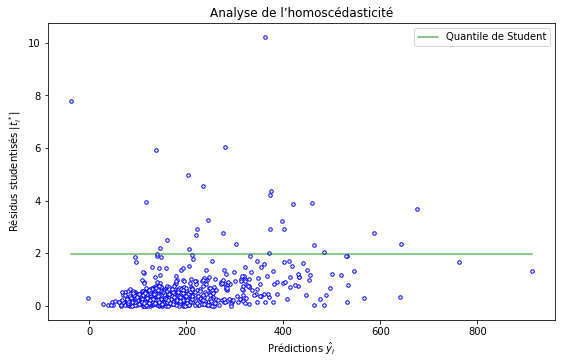

In [ ]:
# analyser le code ci-dessous 
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()